In [119]:
include("../../Ofdm.jl")
include("../../../../Channel/Channel.jl")
using Plots

In [120]:
nbits = 2000
M = 4
qam = Ofdm.QamMod(M)
nfft=64; cpsize=16; npi=12; ngc=6; ndim=(2,2)
params = Ofdm.OfdmParams(nfft,cpsize,npi,ngc,ndim; pilot_type=:comb, pilot_space=4, pilot_interval=2)
indices = Ofdm.get_indices(params)
tx_frame = Ofdm.gen_frame(params, indices, 20)
pdp = Channel.exponent(10,20);

In [121]:
# 送信機
tx_bit = rand(nbits) .> 0.5
tx_symbol = Ofdm.qammod(qam, tx_bit)
tx_ofdmsig = Ofdm.ofdmmod(params, tx_frame, tx_symbol, indices);

In [122]:
rx_ofdmsig, cir = Channel.multipath_fading(tx_ofdmsig, ndim, pdp, istail=false)
# rx_ofdmsig = Channel.awgn(rx_ofdmsig, 0.01)

(Complex{Float64}[0.4629384931840641 + 0.06043103233028871im -0.6407173118362929 + 0.09665723693617584im; -0.11074114312391503 + 0.39883189341989506im -0.13896722135849987 - 0.4144585484840406im; … ; 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im], Complex{Float64}[0.2747592931689173 + 0.07806271252515054im; 0.6629586991336109 + 0.18175868623261815im; … ; 0.06854396436660233 - 0.01590355535001238im; 0.03938537942488852 - 0.08390485923261684im]

Complex{Float64}[0.30718899009322065 - 0.351545962619559im; 0.0116099372351362 - 0.11525152093445289im; … ; -0.0948833154593109 - 0.04049672453923844im; 0.00792166448340292 - 0.01847943411669994im]

Complex{Float64}[0.7672893246432315 + 0.25633633820047846im; -0.17140991615653528 + 0.4628813374558777im; … ; -0.07893500619100104 + 0.04496353676385531im; -0.024841332054567424 + 0.001494818965915216im]

Complex{Float64}[-0.2770815144958494 - 0.11931518628095109im; 0.14343535438940766 - 0.4396237038124666im; … ; -0.0512386636437084 - 0.03096580033

In [123]:
rx_frame = Ofdm.ofdmdemod(params, rx_ofdmsig);

In [124]:
cfr = Ofdm.get_cfr(cir, params.nfft, size(rx_frame,2));

In [125]:
cfr_est = Ofdm.channel_estimation(params, rx_frame, tx_frame, indices);

In [126]:
cfr_est = zeros(ComplexF64, size(rx_frame)..., size(tx_frame,3));
Ofdm.pilot_divide!(cfr_est, rx_frame, tx_frame, indices[:frame])

In [127]:
Ofdm.interpolate!(cfr_est, :time, indices[:pilot], indices[:frame])

In [128]:
Ofdm.interpolate!(cfr_est, :freq, indices[:pilot], indices[:frame])

knots = [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54]


In [87]:
ave_cfr = Ofdm.time_ave_pilot(cfr_est, indices[:pilot], indices[:frame])[:,1,1]

64-element Array{Complex{Float64},1}:
                  0.0 + 0.0im                
 0.021371681592895524 - 0.11874796814051293im
                  0.0 + 0.0im                
                  0.0 + 0.0im                
                  0.0 + 0.0im                
  -0.1560144840694474 - 0.47245070627027963im
                  0.0 + 0.0im                
                  0.0 + 0.0im                
                  0.0 + 0.0im                
  -1.0883242629996754 - 0.18970324074229294im
                  0.0 + 0.0im                
                  0.0 + 0.0im                
                  0.0 + 0.0im                
                      ⋮                      
                  0.0 + 0.0im                
    -0.34286102383515 + 0.11182088461571452im
                  0.0 + 0.0im                
                  0.0 + 0.0im                
                  0.0 + 0.0im                
  -0.5087272018378025 + 0.4942214639379776im 
                  0.0 + 0.0im             

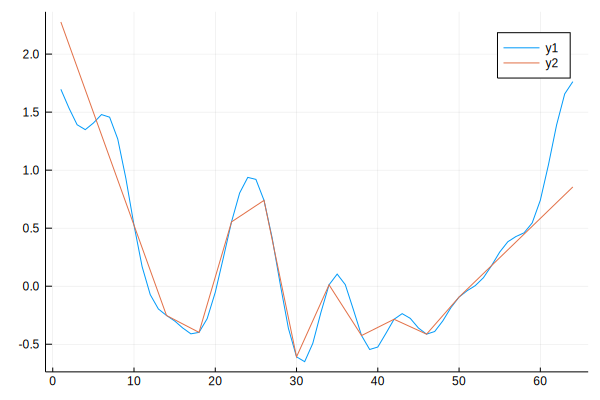

In [129]:
plot(real(cfr[:,1,1,1]))
plot!(real(cfr_est[:,1,1,1]))